In [24]:
import pandas as pd
import numpy as np
import joblib

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

pd.options.display.max_seq_items = 2000

# import python modules
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/Users/tabea/Documents/UrbanMobility/src')
from models import random_forest_model as model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Random Forest and Gradient Boosting

### Data Preparation

In [111]:
journey_16 = pd.read_csv('../data/processed/aggregated_journey_data/agg_journey_data_2016.csv', parse_dates=['end_date', 'start_date'], index_col=0)
journey_17 = pd.read_csv('../data/processed/aggregated_journey_data/agg_journey_data_2017.csv', parse_dates=['end_date', 'start_date'], index_col=0)
journey_18 = pd.read_csv('../data/processed/aggregated_journey_data/agg_journey_data_2018.csv', parse_dates=['end_date', 'start_date'], index_col=0)
journey_19 = pd.read_csv('../data/processed/aggregated_journey_data/agg_journey_data_2019.csv', parse_dates=['end_date', 'start_date'], index_col=0)

In [112]:
journey_train = pd.concat([journey_16, journey_17, journey_18])
journey_test = journey_19.copy()

x_train, y_train, x_test, y_test = model.train_test_split(journey_train, journey_test)

In [4]:
print("Shape x_train and y_train",  x_train.shape, y_train.shape)

Shape x_train and y_train (305404, 104) (305404,)


### Model 1: Random Forest, with hyperparameter tuning, aggregation: hourly

In [6]:
# hyperparameter tuning
random_search = model.hyper_param_tuning(x_train, y_train, 10, 3)

# print or log all tried parameters and their scores
print(pd.DataFrame(random_search.cv_results_)[['params', 'mean_test_score', 'rank_test_score']])

# predict on the test set using the best model
rf = random_search.best_estimator_
y_pred = rf.predict(x_test)

                                              params  mean_test_score  rank_test_score
0  {'max_depth': 11, 'min_samples_leaf': 4, 'min_...         0.830273                9
1  {'max_depth': 15, 'min_samples_leaf': 8, 'min_...         0.860645                4
2  {'max_depth': 11, 'min_samples_leaf': 3, 'min_...         0.830731                8
3  {'max_depth': 15, 'min_samples_leaf': 8, 'min_...         0.860879                3
4  {'max_depth': 12, 'min_samples_leaf': 8, 'min_...         0.840575                7
5  {'max_depth': 9, 'min_samples_leaf': 2, 'min_s...         0.786472               10
6  {'max_depth': 18, 'min_samples_leaf': 6, 'min_...         0.873432                1
7  {'max_depth': 16, 'min_samples_leaf': 5, 'min_...         0.870832                2
8  {'max_depth': 14, 'min_samples_leaf': 6, 'min_...         0.859290                5
9  {'max_depth': 13, 'min_samples_leaf': 1, 'min_...         0.856927                6


In [9]:
print(rf)

RandomForestRegressor(max_depth=18, min_samples_leaf=6, min_samples_split=3,
                      n_estimators=291, random_state=42)


In [7]:
# save the model
joblib.dump(rf, '../models/random_forest.pkl')

['../models/random_forest.pkl']

In [22]:
# evaluation metrics
rmse, mae, r2 = model.evaluation_metrics(y_test, y_pred)

print('RMSE:', rmse)
print('MAE:', mae)
print('R2 Score:', r2)

RMSE: 52.629349135049885
MAE: 26.084786055217304
R2 Score: 0.8561147834124019


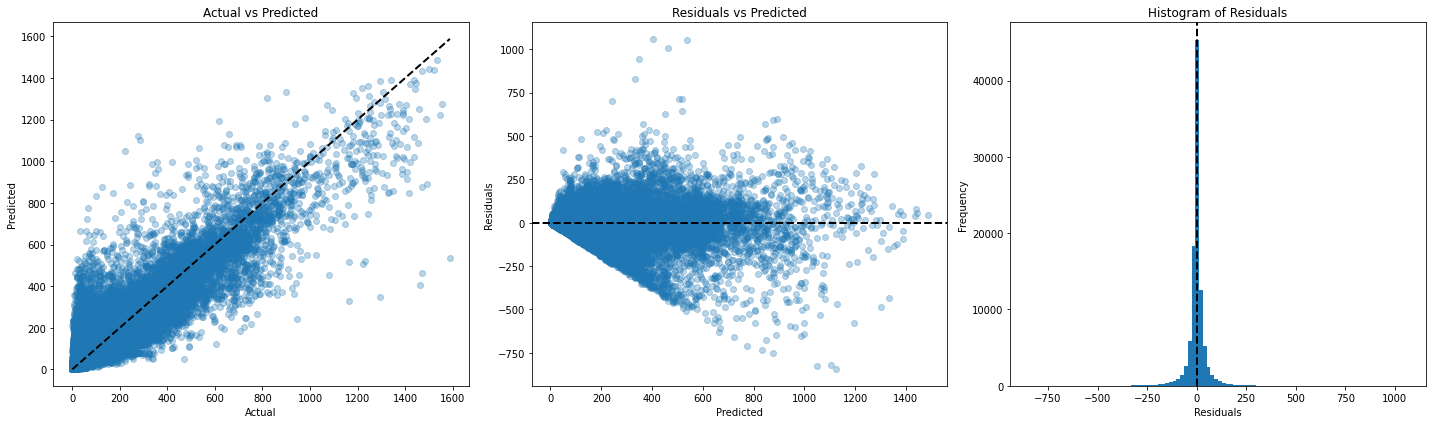

In [14]:
# evaluation visualisation
model.evaluation_vis(y_test, y_pred)

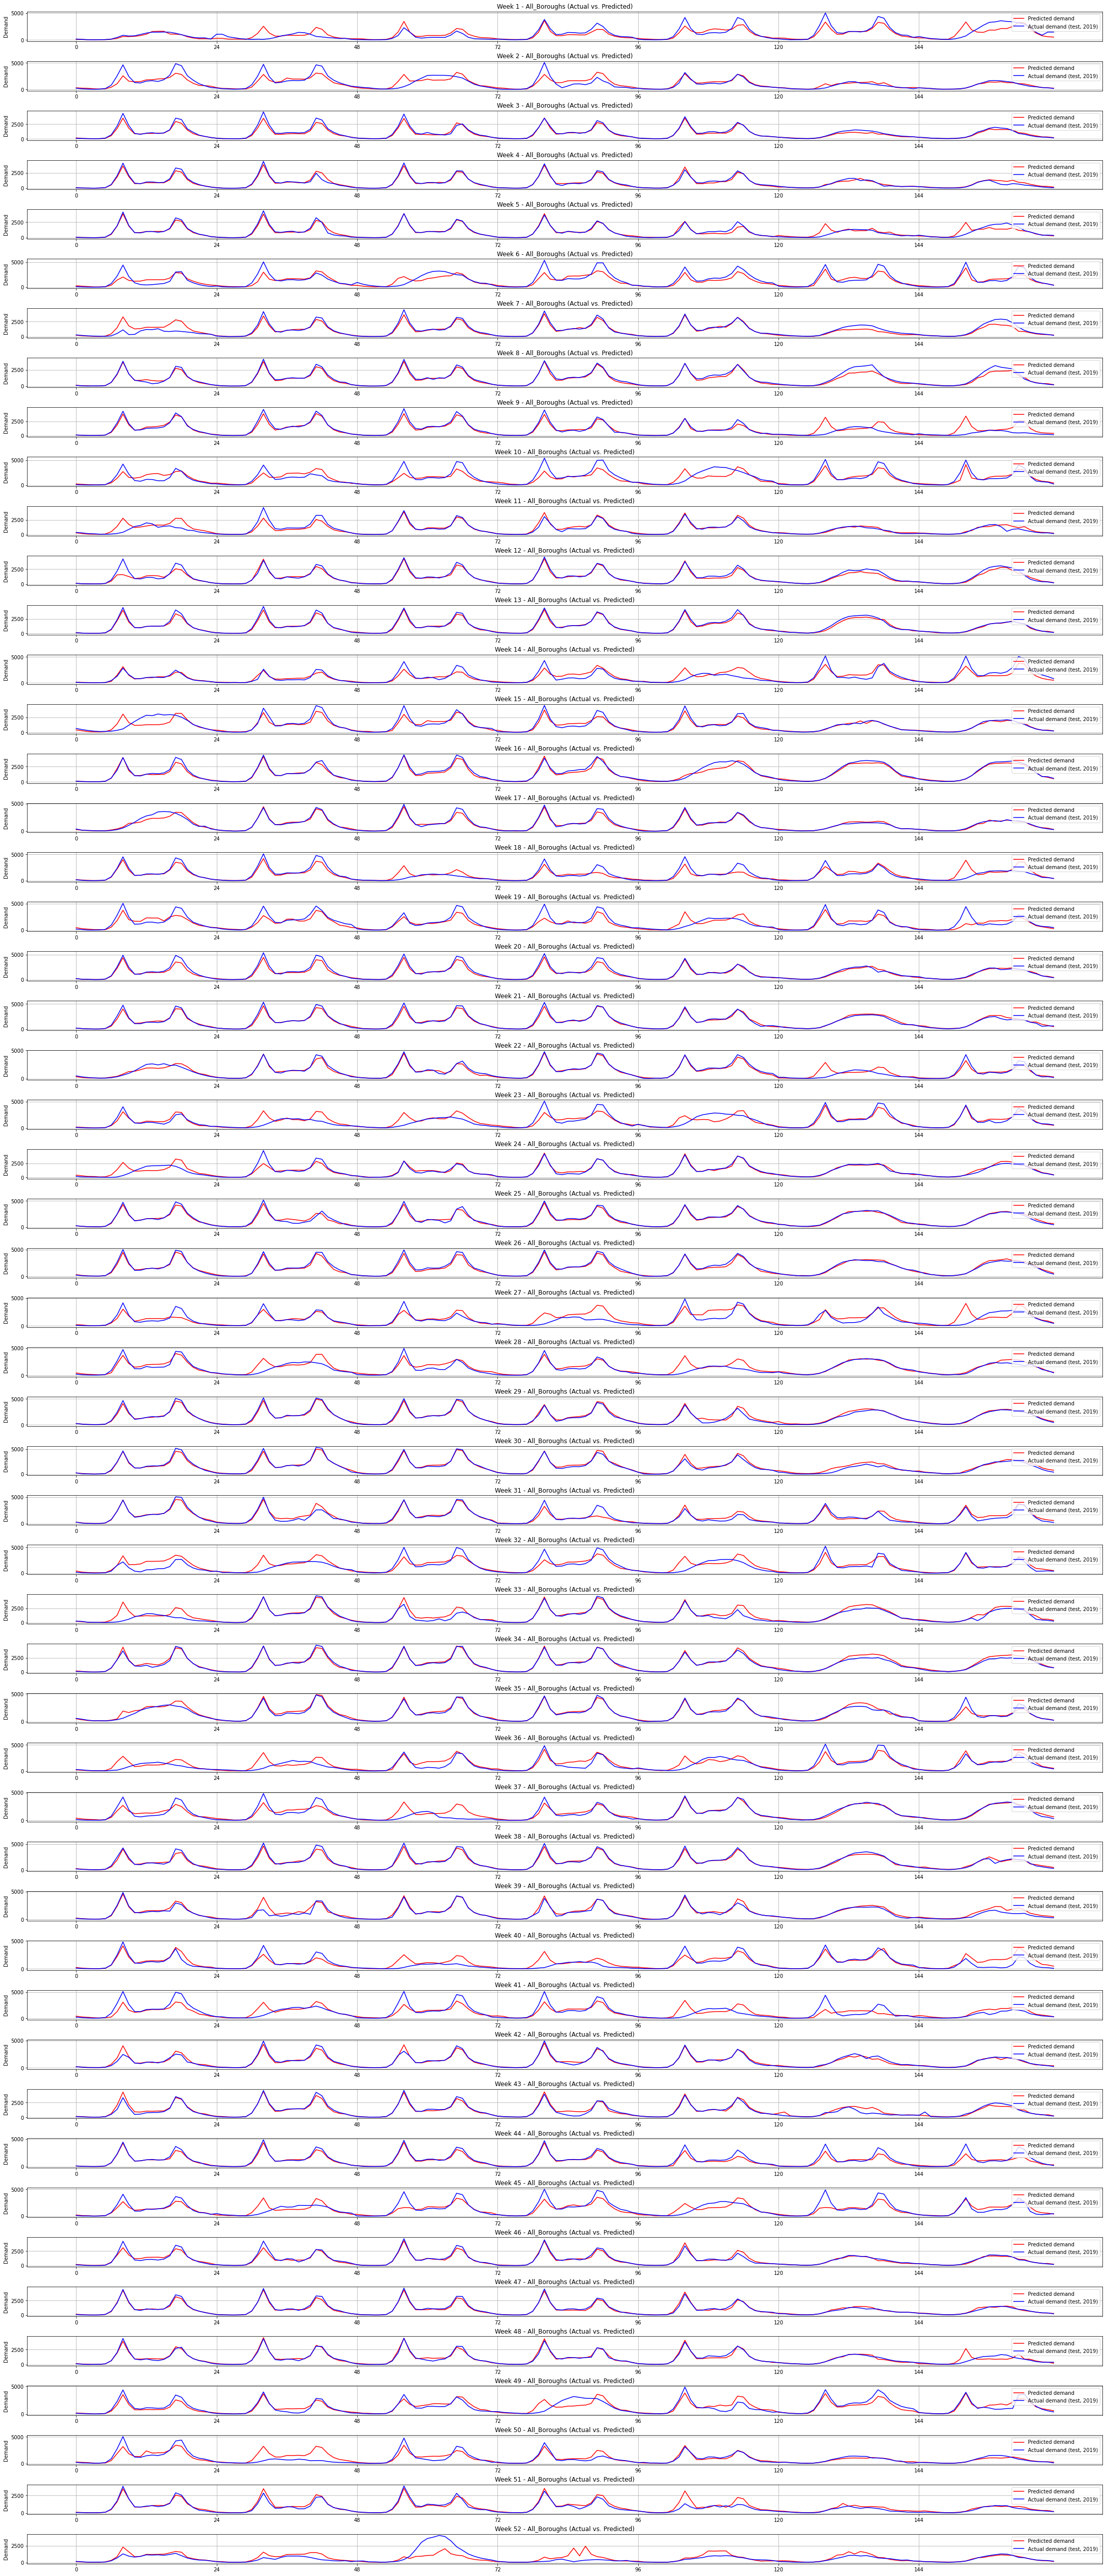

In [15]:
# visualisation: pred vs actual
model.evaluation_actual_vs_predicted(y_test, y_pred, journey_test, 'All_Boroughs', 'model_random_forest')

In [ ]:
# visualisation: pred vs actual per borough
boroughs = ['Westminster', 'Tower Hamlets', 'Kensington and Chelsea', 'Camden', 'Hammersmith and Fulham', 'Lambeth', 'Wandsworth', 'Southwark', 
            'Hackney', 'City of London', 'Islington', 'Newham']

for borough in boroughs:
    model.evaluation_actual_vs_predicted(y_test, y_pred, journey_test, borough, 'model_random_forest')

In [23]:
# investigate elements with highest errors
df_errors = model.get_enornous_entrie(y_test, y_pred, x_test)
df_errors.head(10)


Actual    Predicted        Error  day_of_week  hour  month  bank_holiday  start_borough_Westminster
100411    1464   404.086225  1059.913775            2    16   12.0           1.0                          1
100399    1588   536.748014  1051.251986            2    15   12.0           1.0                          1
100387    1470   464.524477  1005.475523            2    14   12.0           1.0                          1
100375    1296   350.311275   945.688725            2    13   12.0           1.0                          1
51682      278  1122.821283   844.821283            3    17    7.0           0.0                          1
100363    1162   331.001824   830.998176            2    12   12.0           1.0                          1
26454      222  1047.927808   825.927808            4    18    4.0           0.0                          1
51694      285  1104.094540   819.094540            3    18    7.0           0.0                          1
96237      126   877.710335   751.710335            1    17   12.0           0.0                          1
100673     101   833.318928   732.318928            3    15   12.0           1.0                          1

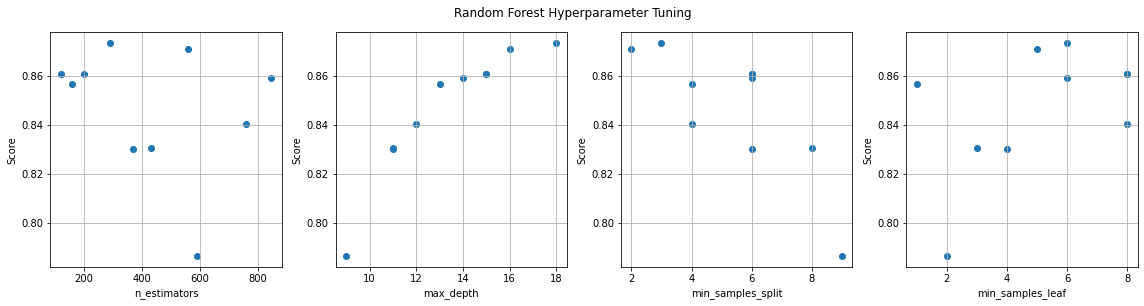

In [36]:
# visualize random search results
model.visualize_random_search_rf(random_search, title='Random Forest Hyperparameter Tuning')

### Model 1b: Random Forest, with 0 demand

In [13]:
# Load the model
rf = joblib.load('../models/random_forest.pkl')

In [14]:
journey_16 = pd.read_csv('../data/processed/aggregated_journey_data/agg_journey_data_2016_with_0_demand.csv', index_col=0)
journey_17 = pd.read_csv('../data/processed/aggregated_journey_data/agg_journey_data_2017_with_0_demand.csv', index_col=0)
journey_18 = pd.read_csv('../data/processed/aggregated_journey_data/agg_journey_data_2018_with_0_demand.csv', index_col=0)
journey_19 = pd.read_csv('../data/processed/aggregated_journey_data/agg_journey_data_2019_with_0_demand.csv', index_col=0)

In [16]:
journey_train = pd.concat([journey_16, journey_17, journey_18])
journey_test = journey_19.copy()

x_train, y_train, x_test, y_test = model.train_test_split(journey_train, journey_test)

In [17]:
x_train.shape

(314748, 104)

In [18]:
# Fit the model on the transformed target
rf.fit(x_train, y_train)

# Predict on the test set
y_pred_daily = rf.predict(x_test)

In [20]:
# evaluation metrics
rmse, mae, r2 = model.evaluation_metrics(y_test, y_pred_daily)

print('RMSE:', rmse)
print('MAE:', mae)
print('R2 Score:', r2)

RMSE: 50.31905526150429
MAE: 24.60123901987008
R2 Score: 0.8666784181790499


In [21]:
# feature importance
print(model.get_feature_importance(rf, x_train).to_string())

                                       Feature    Importance
1                                         hour  4.285642e-01
7                                 day_of_month  7.207321e-02
19                         bike_station_counts  4.877545e-02
20                           bike_docks_counts  4.842835e-02
0                                  day_of_week  2.787929e-02
37                     religion_buddhist_ratio  2.767700e-02
10                                   feelslike  2.703777e-02
9                                         temp  2.631218e-02
34                     ethnic_arab_other_ratio  2.618396e-02
56                         crime_offences_rate  2.611885e-02
74               residence_lengh_uk_born_ratio  2.359379e-02
3                                  part_of_day  2.340208e-02
103                  start_borough_Westminster  2.145662e-02
48                              health_1_ratio  2.132883e-02
2                                   is_weekend  2.089141e-02
8                       

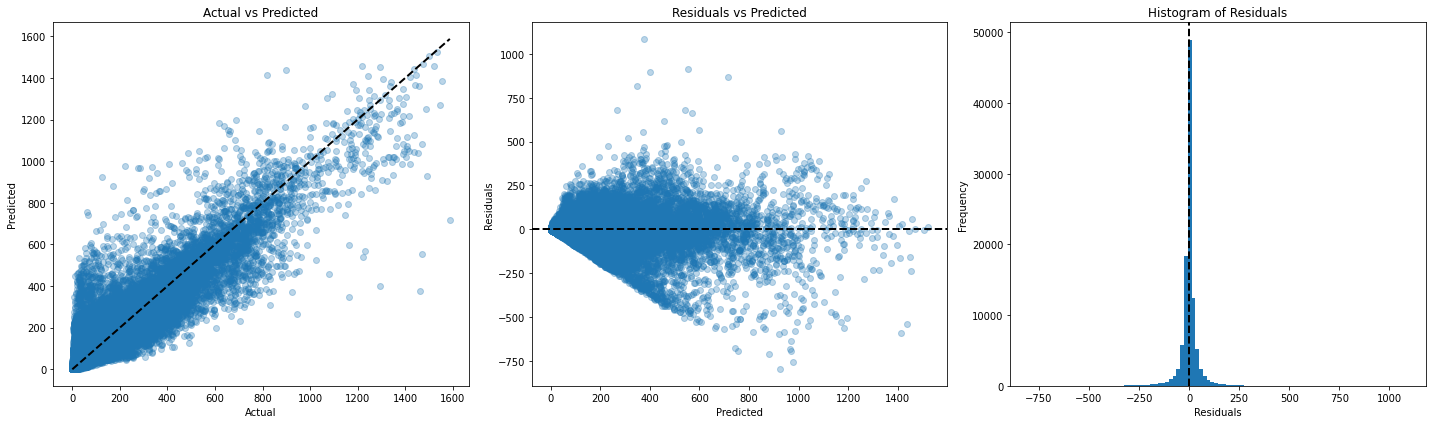

In [30]:
# evaluation visualisation
model.evaluation_vis(y_test, y_pred_daily)

### Model 1c: Random Forest, aggregation: daily

In [ ]:
journey_16 = pd.read_csv('../data/processed/aggregated_journey_data/agg_journey_data_daily_2016.csv', parse_dates=['end_date', 'start_date'], index_col=0)
journey_17 = pd.read_csv('../data/processed/aggregated_journey_data/agg_journey_data_daily_2017.csv', parse_dates=['end_date', 'start_date'], index_col=0)
journey_18 = pd.read_csv('../data/processed/aggregated_journey_data/agg_journey_data_daily_2018.csv', parse_dates=['end_date', 'start_date'], index_col=0)
journey_19 = pd.read_csv('../data/processed/aggregated_journey_data/agg_journey_data_daily_2019.csv', parse_dates=['end_date', 'start_date'], index_col=0)

In [ ]:
journey_train = pd.concat([journey_16, journey_17, journey_18])
journey_test = journey_19.copy()

x_train_daily, y_train_daily, x_test_daily, y_test_daily = model.train_test_split(journey_train, journey_test)

In [ ]:
x_train.head(13)

day_of_week  hour  is_weekend  part_of_day    month  season  bank_holiday   tempmax  tempmin      temp  feelslike  humidity   precip  windgust  windspeed  cloudcover  visibility  uvindex  daylight_hours  day_of_month  day_of_year  bike_station_counts  bike_docks_counts  population_density  age_mean  age_25_percentile  age_75_percentile  female_ratio  householdsize_1_ratio  householdsize_2_ratio  householdsize_3-5_ratio  householdsize_6+_ratio  ethnic_asian_ratio  ethnic_african_caribbean_ratio  ethnic_mixed_ratio  ethnic_white_ratio  ethnic_arab_other_ratio  religion_no_ratio  religion_christian_ratio  religion_buddhist_ratio  religion_hindu_ratio  religion_jewish_ratio  religion_muslim_ratio  religion_sikh_ratio  highes_education_no_ratio  highes_education_l1_ratio  highes_education_l2_ratio  highes_education_apprenticeship_ratio  highes_education_l3_ratio  highes_education_l4_ratio  health_1_ratio  health_2_ratio  health_3_ratio  health_4_ratio  health_5_ratio  \
0             4     0    0.000000            5 1.000000       4      1.000000  8.600000 2.600000  5.900000   5.900000 84.700000 3.800000 50.000000   0.200000   61.300000   18.600000 1.000000        7.921389             1            1                   64               1782         9640.900000 37.006034          22.000000          52.000000      0.526573               0.387345               0.309217                 0.279095                0.024343            0.181035                        0.089904            0.066328            0.595157                 0.067575           0.346325                  0.313984                 0.011469              0.018992               0.047964               0.160989             0.002318                   0.117746                   0.050565                   0.071812                               0.019122                   0.141387                   0.572945        0.012644        0.038132        0.100454        0.293453        0.555317   
1             4     0    0.000000            5 1.000000       4      1.000000  8.600000 2.600000  5.900000   5.900000 84.700000 3.800000 50.000000   0.200000   61.300000   18.600000 1.000000        7.921389             1            1                   38                977         2975.000000 40.704977          26.000000          55.000000      0.449843               0.509972               0.359585                 0.124746                0.005698            0.168336                        0.027027            0.054753            0.693733                 0.056151           0.438476                  0.346772                 0.011070              0.023654               0.020625               0.062922             0.000699                   0.066075                   0.027854                   0.048963                               0.009993                   0.088434                   0.741819        0.005476        0.021671        0.080042        0.317605        0.575207   
2             4     0    0.000000            5 1.000000       4      1.000000  8.600000 2.600000  5.900000   5.900000 84.700000 3.800000 50.000000   0.200000   61.300000   18.600000 1.000000        7.921389             1            1                   39               1167        13593.300000 34.288071          21.000000          47.000000      0.522111               0.329258               0.307718                 0.320189                0.042835            0.103744                        0.210865            0.067479            0.531393                 0.086518           0.363167                  0.306774                 0.009041              0.007710               0.067244               0.133431             0.007204                   0.167295                   0.061021                   0.083302                               0.023574                   0.115392                   0.523822        0.013533        0.036532        0.099210        0.284110        0.566615   
3             4     0    0.000000            5 1.000000       4     

In [ ]:
# Fit the model on the transformed target
rf.fit(x_train, y_train_daily)

# Predict on the test set
y_pred_daily = rf.predict(x_test_daily)

In [ ]:
# evaluation metrics
rmse, mae, r2 = model.evaluation_metrics(y_test_daily, y_pred_daily)

print('RMSE:', rmse)
print('MAE:', mae)
print('R2 Score:', r2)

RMSE: 555.5012372809776
MAE: 345.94694424320704
R2 Score: 0.9063123656307778


In [ ]:
# feature importance
print(model.get_feature_importance(rf, x_train_daily).to_string())

                                       Feature  Importance
21                         bike_station_counts    0.124688
22                           bike_docks_counts    0.122032
76               residence_lengh_uk_born_ratio    0.081540
39                     religion_buddhist_ratio    0.080038
50                              health_1_ratio    0.078748
58                         crime_offences_rate    0.074600
19                                day_of_month    0.072647
7                                      tempmax    0.072493
36                     ethnic_arab_other_ratio    0.070737
105                  start_borough_Westminster    0.068682
12                                      precip    0.014549
11                                    humidity    0.010804
0                                  day_of_week    0.009996
20                                 day_of_year    0.008006
2                                   is_weekend    0.007686
17                                     uvindex    0.0063

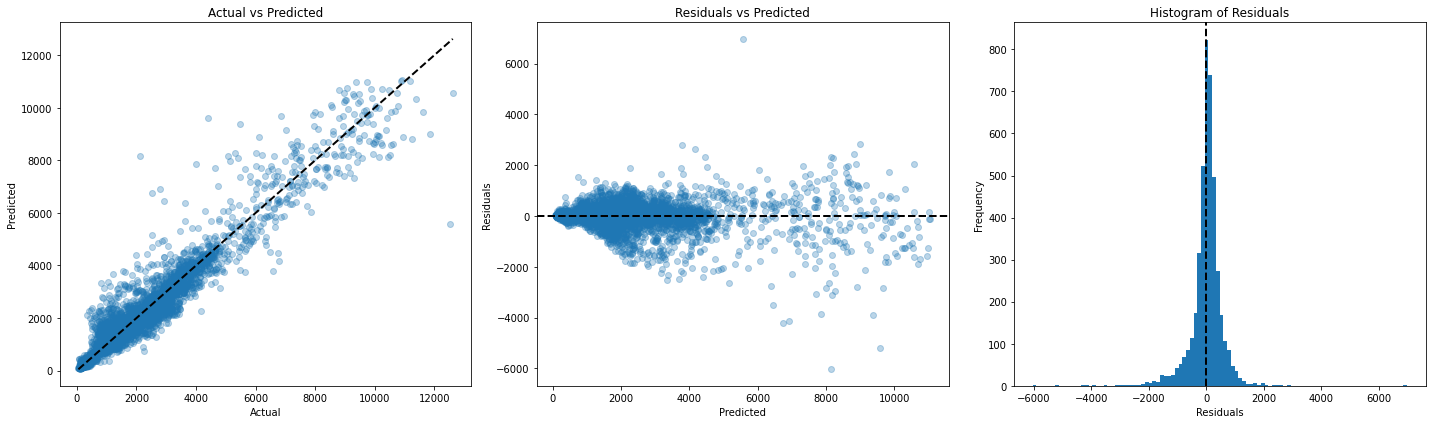

In [ ]:
# evaluation visualisation
model.evaluation_vis(y_test_daily, y_pred_daily)

In [ ]:
# investigate elements with highest errors
df_errors = model.get_enornous_entrie(y_test_daily, y_pred_daily, x_test_daily)
df_errors.head(10)

Actual   Predicted       Error  day_of_week  hour     month  bank_holiday  start_borough_Westminster
4307   12538 5570.268149 6967.731851            2     0 12.000000      1.000000                          1
4127    2113 8147.593598 6034.593598            1     0 12.000000      0.000000                          1
2603    4415 9597.467300 5182.467300            0     0  8.000000      1.000000                          1
3047    2520 6741.178342 4221.178342            2     0  9.000000      0.000000                          1
3347    2778 6925.613327 4147.613327            6     0 10.000000      0.000000                          1
2243    5490 9382.729904 3892.729904            5     0  7.000000      0.000000                          1
2219    3996 7868.082303 3872.082303            3     0  7.000000      0.000000                          1
503     2937 6435.313027 3498.313027            0     0  2.000000      0.000000                          1
119     5060 8176.609415 3116.609415            3     0  1.000000      0.000000                          1
2315    4643 7702.282268 3059.282268            4     0  7.000000      1.000000                          1

In [136]:
journey_16 = pd.read_csv('../data/processed/aggregated_journey_data/agg_journey_data_daily_2016.csv', parse_dates=['end_date', 'start_date'], index_col=0)
journey_17 = pd.read_csv('../data/processed/aggregated_journey_data/agg_journey_data_daily_2017.csv', parse_dates=['end_date', 'start_date'], index_col=0)
journey_18 = pd.read_csv('../data/processed/aggregated_journey_data/agg_journey_data_daily_2018.csv', parse_dates=['end_date', 'start_date'], index_col=0)
journey_19 = pd.read_csv('../data/processed/aggregated_journey_data/agg_journey_data_daily_2019.csv', parse_dates=['end_date', 'start_date'], index_col=0)

In [127]:
journey_train = pd.concat([journey_16, journey_17, journey_18])
journey_test = journey_19.copy()

x_train_daily, y_train_daily, x_test_daily, y_test_daily = model.train_test_split(journey_train, journey_test)

In [125]:
x_train.head(13)

day_of_week  hour  is_weekend  part_of_day    month  season  bank_holiday   tempmax  tempmin      temp  feelslike  humidity   precip  windgust  windspeed  cloudcover  visibility  uvindex  daylight_hours  day_of_month  day_of_year  bike_station_counts  bike_docks_counts  population_density  age_mean  age_25_percentile  age_75_percentile  female_ratio  householdsize_1_ratio  householdsize_2_ratio  householdsize_3-5_ratio  householdsize_6+_ratio  ethnic_asian_ratio  ethnic_african_caribbean_ratio  ethnic_mixed_ratio  ethnic_white_ratio  ethnic_arab_other_ratio  religion_no_ratio  religion_christian_ratio  religion_buddhist_ratio  religion_hindu_ratio  religion_jewish_ratio  religion_muslim_ratio  religion_sikh_ratio  highes_education_no_ratio  highes_education_l1_ratio  highes_education_l2_ratio  highes_education_apprenticeship_ratio  highes_education_l3_ratio  highes_education_l4_ratio  health_1_ratio  health_2_ratio  health_3_ratio  health_4_ratio  health_5_ratio  \
0             4     0    0.000000            5 1.000000       4      1.000000  8.600000 2.600000  5.900000   5.900000 84.700000 3.800000 50.000000   0.200000   61.300000   18.600000 1.000000        7.921389             1            1                   64               1782         9640.900000 37.006034          22.000000          52.000000      0.526573               0.387345               0.309217                 0.279095                0.024343            0.181035                        0.089904            0.066328            0.595157                 0.067575           0.346325                  0.313984                 0.011469              0.018992               0.047964               0.160989             0.002318                   0.117746                   0.050565                   0.071812                               0.019122                   0.141387                   0.572945        0.012644        0.038132        0.100454        0.293453        0.555317   
1             4     0    0.000000            5 1.000000       4      1.000000  8.600000 2.600000  5.900000   5.900000 84.700000 3.800000 50.000000   0.200000   61.300000   18.600000 1.000000        7.921389             1            1                   38                977         2975.000000 40.704977          26.000000          55.000000      0.449843               0.509972               0.359585                 0.124746                0.005698            0.168336                        0.027027            0.054753            0.693733                 0.056151           0.438476                  0.346772                 0.011070              0.023654               0.020625               0.062922             0.000699                   0.066075                   0.027854                   0.048963                               0.009993                   0.088434                   0.741819        0.005476        0.021671        0.080042        0.317605        0.575207   
2             4     0    0.000000            5 1.000000       4      1.000000  8.600000 2.600000  5.900000   5.900000 84.700000 3.800000 50.000000   0.200000   61.300000   18.600000 1.000000        7.921389             1            1                   39               1167        13593.300000 34.288071          21.000000          47.000000      0.522111               0.329258               0.307718                 0.320189                0.042835            0.103744                        0.210865            0.067479            0.531393                 0.086518           0.363167                  0.306774                 0.009041              0.007710               0.067244               0.133431             0.007204                   0.167295                   0.061021                   0.083302                               0.023574                   0.115392                   0.523822        0.013533        0.036532        0.099210        0.284110        0.566615   
3             4     0    0.000000            5 1.000000       4     

In [128]:
# Fit the model on the transformed target
rf.fit(x_train, y_train_daily)

# Predict on the test set
y_pred_daily = rf.predict(x_test_daily)

In [129]:
# evaluation metrics
rmse, mae, r2 = model.evaluation_metrics(y_test_daily, y_pred_daily)

print('RMSE:', rmse)
print('MAE:', mae)
print('R2 Score:', r2)

RMSE: 555.5012372809776
MAE: 345.94694424320704
R2 Score: 0.9063123656307778


In [130]:
# feature importance
print(model.get_feature_importance(rf, x_train_daily).to_string())

                                       Feature  Importance
21                         bike_station_counts    0.124688
22                           bike_docks_counts    0.122032
76               residence_lengh_uk_born_ratio    0.081540
39                     religion_buddhist_ratio    0.080038
50                              health_1_ratio    0.078748
58                         crime_offences_rate    0.074600
19                                day_of_month    0.072647
7                                      tempmax    0.072493
36                     ethnic_arab_other_ratio    0.070737
105                  start_borough_Westminster    0.068682
12                                      precip    0.014549
11                                    humidity    0.010804
0                                  day_of_week    0.009996
20                                 day_of_year    0.008006
2                                   is_weekend    0.007686
17                                     uvindex    0.0063

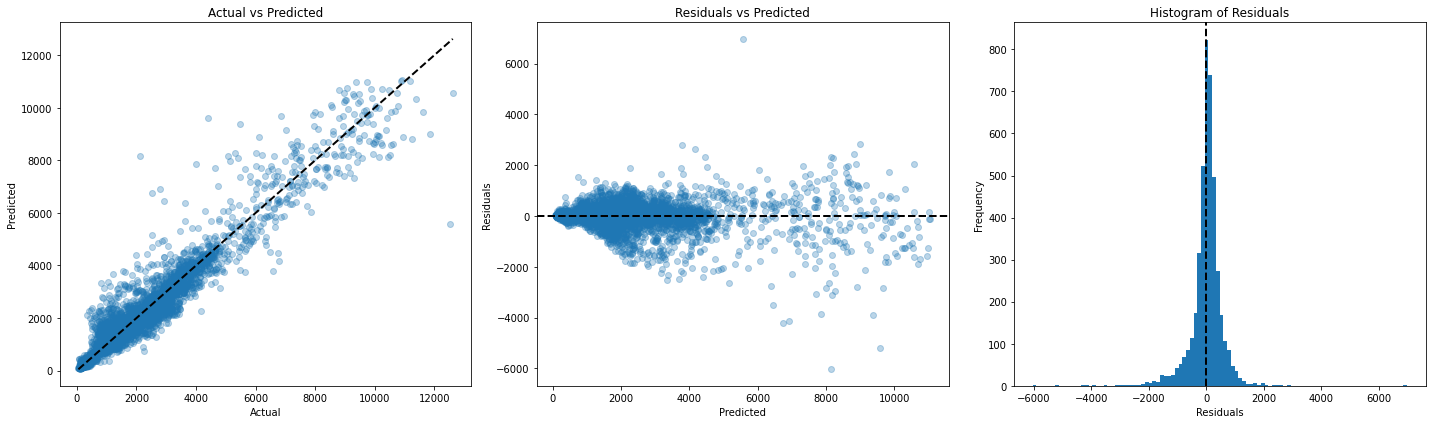

In [132]:
# evaluation visualisation
model.evaluation_vis(y_test_daily, y_pred_daily)

In [134]:
# investigate elements with highest errors
df_errors = model.get_enornous_entrie(y_test_daily, y_pred_daily, x_test_daily)
df_errors.head(10)

Actual   Predicted       Error  day_of_week  hour     month  bank_holiday  start_borough_Westminster
4307   12538 5570.268149 6967.731851            2     0 12.000000      1.000000                          1
4127    2113 8147.593598 6034.593598            1     0 12.000000      0.000000                          1
2603    4415 9597.467300 5182.467300            0     0  8.000000      1.000000                          1
3047    2520 6741.178342 4221.178342            2     0  9.000000      0.000000                          1
3347    2778 6925.613327 4147.613327            6     0 10.000000      0.000000                          1
2243    5490 9382.729904 3892.729904            5     0  7.000000      0.000000                          1
2219    3996 7868.082303 3872.082303            3     0  7.000000      0.000000                          1
503     2937 6435.313027 3498.313027            0     0  2.000000      0.000000                          1
119     5060 8176.609415 3116.609415            3     0  1.000000      0.000000                          1
2315    4643 7702.282268 3059.282268            4     0  7.000000      1.000000                          1

### Model 2: Random Forest, Log-Transformed, aggregation: hourly

In [38]:
# Apply a log transformation to the target
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Fit the model on the transformed target
rf.fit(x_train, y_train_log)

# Predict on the test set
y_pred_log = rf.predict(x_test)

In [100]:
# Apply the inverse log transformation -> original scale
y_pred_log_inverse = np.expm1(y_pred_log)
y_test_log_inverse = np.expm1(y_test_log)


# evaluation metrics
rmse, mae, r2 = model.evaluation_metrics(y_test_log, y_pred_log)

print('RMSE:', rmse)
print('MAE:', mae)
print('R2 Score:', r2)

RMSE: 0.506106019265201
MAE: 0.35899486163815914
R2 Score: 0.8699672635667952


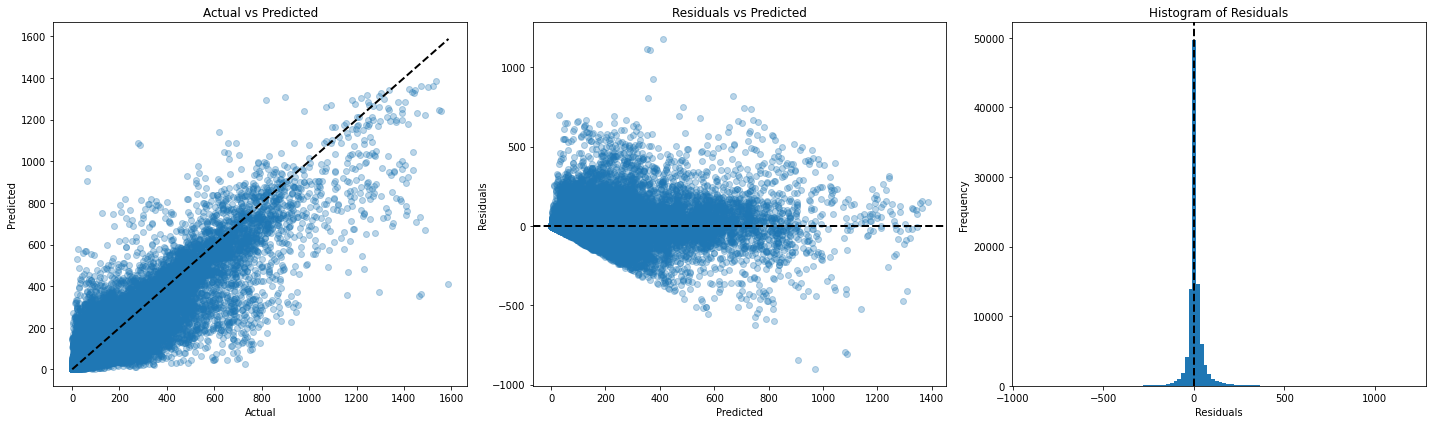

In [101]:
# evaluation visualisation
model.evaluation_vis(y_test_log_inverse, y_pred_log_inverse)

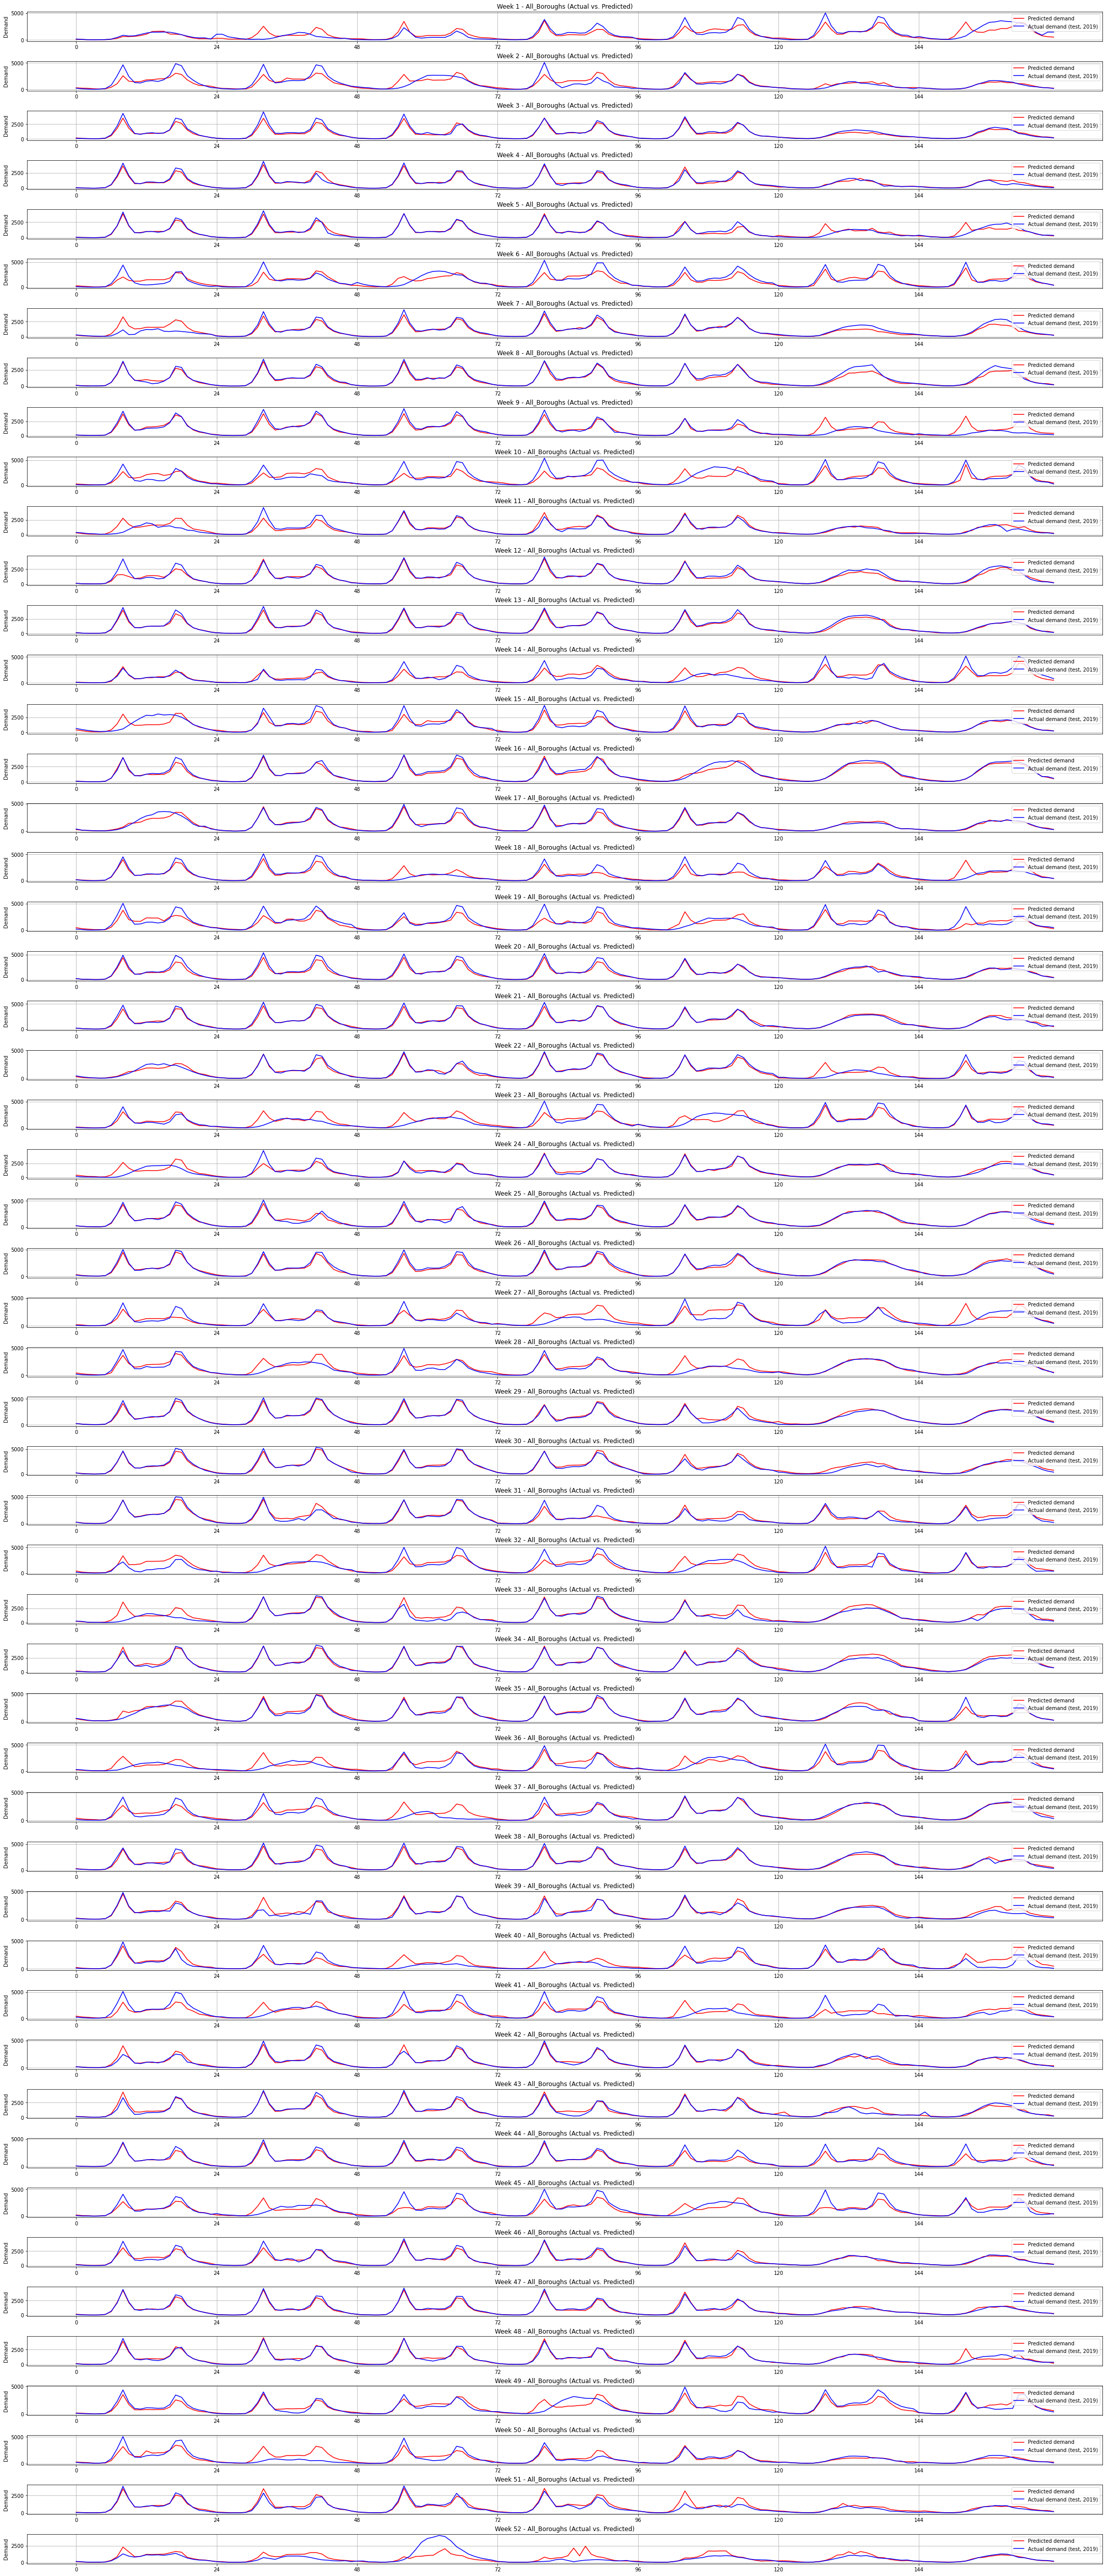

In [55]:
# visualisation: pred vs actual
model.evaluation_actual_vs_predicted(y_test, y_pred, journey_test, 'All_Boroughs', 'model_random_forest')

In [56]:
# investigate elements with highest errors
df_errors = model.get_enornous_entrie(y_test, y_pred, x_test)
df_errors.head(10)

Actual    Predicted        Error  day_of_week  hour  month  bank_holiday  start_borough_Westminster
100411    1464   404.086225  1059.913775            2    16   12.0           1.0                          1
100399    1588   536.748014  1051.251986            2    15   12.0           1.0                          1
100387    1470   464.524477  1005.475523            2    14   12.0           1.0                          1
100375    1296   350.311275   945.688725            2    13   12.0           1.0                          1
51682      278  1122.821283   844.821283            3    17    7.0           0.0                          1
100363    1162   331.001824   830.998176            2    12   12.0           1.0                          1
26454      222  1047.927808   825.927808            4    18    4.0           0.0                          1
51694      285  1104.094540   819.094540            3    18    7.0           0.0                          1
96237      126   877.710335   751.710335            1    17   12.0           0.0                          1
100673     101   833.318928   732.318928            3    15   12.0           1.0                          1

### Model 3: Random Forest, Standandardised Demand, aggregation: hourly

In [ ]:
# makes sense: randomness with more imortant features

In [48]:
# test and train split with standardisation by dock station
x_train_stand, y_train_stand, x_test_stand, y_test_stand = model.train_test_split(journey_train, journey_test, standardise=True)

In [61]:
# fit and predict
rf.fit(x_train_stand, y_train_stand)
y_pred_stand = rf.predict(x_test_stand)

In [73]:
# evaluation metrics
rmse_stand, mae_stand, r2_stand = model.evaluation_metrics(y_test_stand, y_pred_stand)

print('RMSE:', rmse_stand)
print('MAE:', mae_stand)
print('R2 Score:', r2_stand)

RMSE: 0.032448816084718904
MAE: 0.016712467660271957
R2 Score: 0.7861222522828534


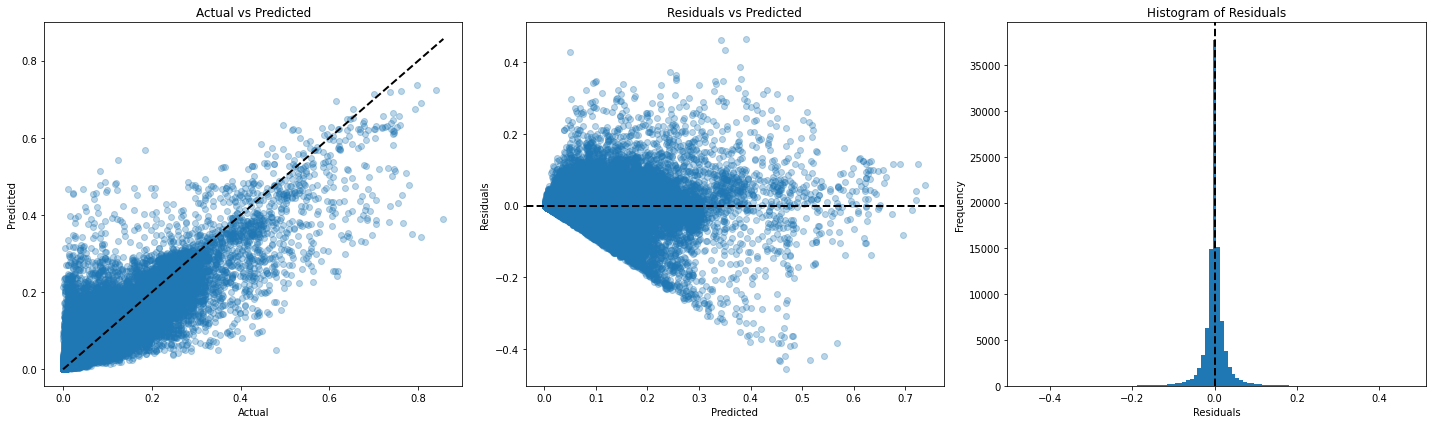

In [75]:
# evaluation visualisation
model.evaluation_vis(y_test_stand, y_pred_stand)

### Model 4: Random Forest, with Moving Average and Lag Feature, aggregation: hourly

In [94]:
borough_cols = ['start_borough_Hackney', 'start_borough_Islington', 'start_borough_City of London', 'start_borough_Westminster', 'start_borough_Tower Hamlets', 'start_borough_Kensington and Chelsea', 'start_borough_Camden', 'start_borough_Hammersmith and Fulham', 'start_borough_Lambeth', 'start_borough_Wandsworth', 'start_borough_Southwark', 'start_borough_Newham']
journey_train_ma_lag = pd.DataFrame()
journey_test_ma_lag = pd.DataFrame()

for borough in borough_cols:
    # select the data for the current borough
    borough_data_train = journey_train[journey_train[borough] == True].copy()
    borough_data_test = journey_test[journey_test[borough] == True].copy()

    # add moving average features to train data
    borough_data_train['demand_ma_3h'] = borough_data_train['demand'].rolling(3).mean()
    borough_data_train['demand_ma_8h'] =  borough_data_train['demand'].rolling(8).mean()
    borough_data_train['demand_ma_24h'] = borough_data_train['demand'].rolling(24).mean()

    # add lagged demand features to train data
    borough_data_train['demand_lag_1h'] = borough_data_train['demand'].shift(1)
    borough_data_train['demand_lag_8h'] = borough_data_train['demand'].shift(8)
    borough_data_train['demand_lag_24h'] = borough_data_train['demand'].shift(24)
    borough_data_train['demand_lag_1w'] = borough_data_train['demand'].shift(24*7)

    # if there is no data for the first x hours, set actual demand as moving average
    borough_data_train['demand_ma_3h'].fillna(borough_data_train['demand'], inplace=True)
    borough_data_train['demand_ma_8h'].fillna(borough_data_train['demand'], inplace=True)
    borough_data_train['demand_ma_24h'].fillna(borough_data_train['demand'], inplace=True)
    borough_data_train['demand_lag_1h'].fillna(borough_data_train['demand'], inplace=True)
    borough_data_train['demand_lag_8h'].fillna(borough_data_train['demand'], inplace=True)
    borough_data_train['demand_lag_24h'].fillna(borough_data_train['demand'], inplace=True)
    borough_data_train['demand_lag_1w'].fillna(borough_data_train['demand'], inplace=True)

    # append the data for the current borough to the new DataFrame
    journey_train_ma_lag = journey_train_ma_lag.append(borough_data_train)

    # add moving average features to test data
    borough_data_test['demand_ma_3h'] = borough_data_test['demand'].rolling(3).mean()
    borough_data_test['demand_ma_8h'] =  borough_data_test['demand'].rolling(8).mean()
    borough_data_test['demand_ma_24h'] = borough_data_test['demand'].rolling(24).mean()

    # add lagged demand features to test data
    borough_data_test['demand_lag_1h'] = borough_data_test['demand'].shift(1)
    borough_data_test['demand_lag_8h'] = borough_data_test['demand'].shift(8)
    borough_data_test['demand_lag_24h'] = borough_data_test['demand'].shift(24)
    borough_data_test['demand_lag_1w'] = borough_data_test['demand'].shift(24*7)

    # if there is no data for the first x hours, set actual demand as moving average
    borough_data_test['demand_ma_3h'].fillna(borough_data_test['demand'], inplace=True)
    borough_data_test['demand_ma_8h'].fillna(borough_data_test['demand'], inplace=True)
    borough_data_test['demand_ma_24h'].fillna(borough_data_test['demand'], inplace=True)
    borough_data_test['demand_lag_1h'].fillna(borough_data_test['demand'], inplace=True)
    borough_data_test['demand_lag_8h'].fillna(borough_data_test['demand'], inplace=True)
    borough_data_test['demand_lag_24h'].fillna(borough_data_test['demand'], inplace=True)
    borough_data_test['demand_lag_1w'].fillna(borough_data_test['demand'], inplace=True)

    # append the data for the current borough to the new DataFrame
    journey_test_ma_lag = journey_test_ma_lag.append(borough_data_test)

# sort the train and test data by date and borough
journey_train_ma_lag.sort_values(['start_date_hour', 'start_borough'], inplace=True)
journey_test_ma_lag.sort_values(['start_date_hour', 'start_borough'], inplace=True)

journey_train_ma_lag.reset_index(drop=True, inplace=True)
journey_test_ma_lag.reset_index(drop=True, inplace=True)

In [98]:
x_train_lag_ma, y_train_lag_ma, x_test_lag_ma, y_test_lag_ma = model.train_test_split(journey_train_ma_lag, journey_test_ma_lag)

In [99]:
rf.fit(x_train_lag_ma, y_train_lag_ma)
y_pred_lag_ma = rf.predict(x_test_lag_ma)

In [102]:
# evaluation metrics
rmse, mae, r2 = model.evaluation_metrics(y_test_lag_ma, y_pred_lag_ma)

print('RMSE:', rmse)
print('MAE:', mae)
print('R2 Score:', r2)

RMSE: 15.991721447289521
MAE: 8.706420856194153
R2 Score: 0.9867153349359711


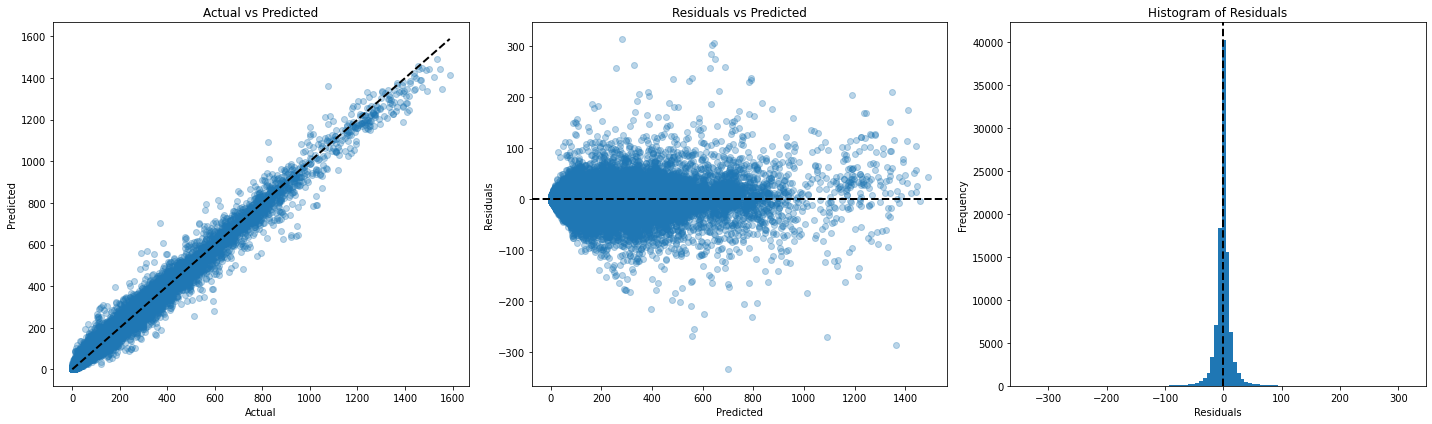

In [104]:
# evaluation visualisation
model.evaluation_vis(y_test_lag_ma, y_pred_lag_ma)

In [107]:
# feature importance
pd.set_option('display.float_format', '{:.6f}'.format)
print(model.get_feature_importance(rf, x_train_lag_ma).to_string())

                                       Feature  Importance
104                               demand_ma_3h    0.792535
3                                  part_of_day    0.072684
1                                         hour    0.065563
109                             demand_lag_24h    0.022606
105                               demand_ma_8h    0.011593
108                              demand_lag_8h    0.011037
107                              demand_lag_1h    0.009795
106                              demand_ma_24h    0.001075
35                           religion_no_ratio    0.000658
19                         bike_station_counts    0.000578
110                              demand_lag_1w    0.000531
71                  accommodation_mobile_ratio    0.000456
20                           bike_docks_counts    0.000447
45       highes_education_apprenticeship_ratio    0.000431
7                                 day_of_month    0.000334
16                                  cloudcover    0.0003

### Model 5: Random Forest, without Borough Characteristics Feature, aggregation: daily

In [115]:
temporal_features = ['hour', 'part_of_day', 'day_of_week', 'day_of_month', 'day_of_year', 'is_weekend', 'month', 'season', 'bank_holiday']
weather_features = ['temp', 'feelslike', 'humidity', 'dew', 'precip', 'windgust', 'windspeed', 'cloudcover', 'visibility', 'uvindex']
borough_features = x_test.columns[~x_test.columns.isin(temporal_features) & ~x_test.columns.isin(weather_features)]

# filter out borough characteristics, keep only temporal and weather features
journey_train_without_borough_characteristics = journey_train.drop(borough_features, axis=1)
journey_train_without_borough_characteristics = journey_test.drop(borough_features, axis=1)

x_train_without_borough_characteristics, y_train_without_borough_characteristics, x_test_without_borough_characteristics, y_test_without_borough_characteristics = model.train_test_split(journey_train_without_borough_characteristics, journey_train_without_borough_characteristics)

In [118]:
# evaluation metrics
rmse, mae, r2 = model.evaluation_metrics(y_test_without_borough_characteristics, y_pred_without_borough_characteristics)

print('RMSE:', rmse)
print('MAE:', mae)
print('R2 Score:', r2)

RMSE: 32.32568620011911
MAE: 15.189638834289779
R2 Score: 0.9457180198334194


In [ ]:
journey_16 = pd.read_csv('../data/processed/aggregated_journey_data/agg_journey_data_2016.csv', parse_dates=['end_date', 'start_date'], index_col=0)
journey_17 = pd.read_csv('../data/processed/aggregated_journey_data/agg_journey_data_2017.csv', parse_dates=['end_date', 'start_date'], index_col=0)
journey_18 = pd.read_csv('../data/processed/aggregated_journey_data/agg_journey_data_2018.csv', parse_dates=['end_date', 'start_date'], index_col=0)
journey_19 = pd.read_csv('../data/processed/aggregated_journey_data/agg_journey_data_2019.csv', parse_dates=['end_date', 'start_date'], index_col=0)

In [117]:
# fit and predict
rf.fit(x_train_without_borough_characteristics, y_train_without_borough_characteristics)
y_pred_without_borough_characteristics = rf.predict(x_test_without_borough_characteristics)

### Model 4: Gradient Boosting, with 0 demand

In [ ]:
# hyperparameter tuning
random_search = model.hyper_param_tuning_gb(x_train, y_train, 10, 3)

In [26]:
# print or log all tried parameters and their scores
params_gb = pd.DataFrame(random_search.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
print(params_gb.head(10))


# predict on the test set using the best model
gb = random_search.best_estimator_
y_pred_gb = gb.predict(x_test)

                                              params  mean_test_score  rank_test_score
0  {'learning_rate': 0.1, 'max_depth': 6, 'min_sa...         0.824413                6
1  {'learning_rate': 0.1, 'max_depth': 4, 'min_sa...         0.793146                9
2  {'learning_rate': 0.1, 'max_depth': 7, 'min_sa...         0.825117                5
3  {'learning_rate': 0.1, 'max_depth': 8, 'min_sa...         0.830358                3
4  {'learning_rate': 0.2, 'max_depth': 8, 'min_sa...         0.823691                7
5  {'learning_rate': 0.2, 'max_depth': 7, 'min_sa...         0.816510                8
6  {'learning_rate': 0.05, 'max_depth': 7, 'min_s...         0.832268                1
7  {'learning_rate': 0.1, 'max_depth': 9, 'min_sa...         0.830716                2
8  {'learning_rate': 0.2, 'max_depth': 3, 'min_sa...         0.771851               10
9  {'learning_rate': 0.1, 'max_depth': 7, 'min_sa...         0.830333                4


In [27]:
# save the model
joblib.dump(gb, '../models/gradient_bossting_with_0_demand.pkl')

['../models/gradient_bossting_with_0_demand.pkl']

In [28]:
# evaluation metrics
rmse, mae, r2 = model.evaluation_metrics(y_test, y_pred_gb)

print('RMSE:', rmse)
print('MAE:', mae)
print('R2 Score:', r2)

RMSE: 50.73496194684668
MAE: 26.388116351048502
R2 Score: 0.8644653999843708


In [29]:
# feature importance
print(model.get_feature_importance(gb, x_train).to_string())

                                       Feature    Importance
1                                         hour  4.239635e-01
7                                 day_of_month  6.333316e-02
48                              health_1_ratio  5.837679e-02
3                                  part_of_day  4.700432e-02
103                  start_borough_Westminster  4.461361e-02
37                     religion_buddhist_ratio  4.240266e-02
31              ethnic_african_caribbean_ratio  3.825829e-02
74               residence_lengh_uk_born_ratio  2.696434e-02
0                                  day_of_week  2.466568e-02
12                                    humidity  2.306298e-02
2                                   is_weekend  2.174161e-02
10                                   feelslike  2.114162e-02
9                                         temp  2.067121e-02
20                           bike_docks_counts  1.826392e-02
56                         crime_offences_rate  1.335346e-02
8                       

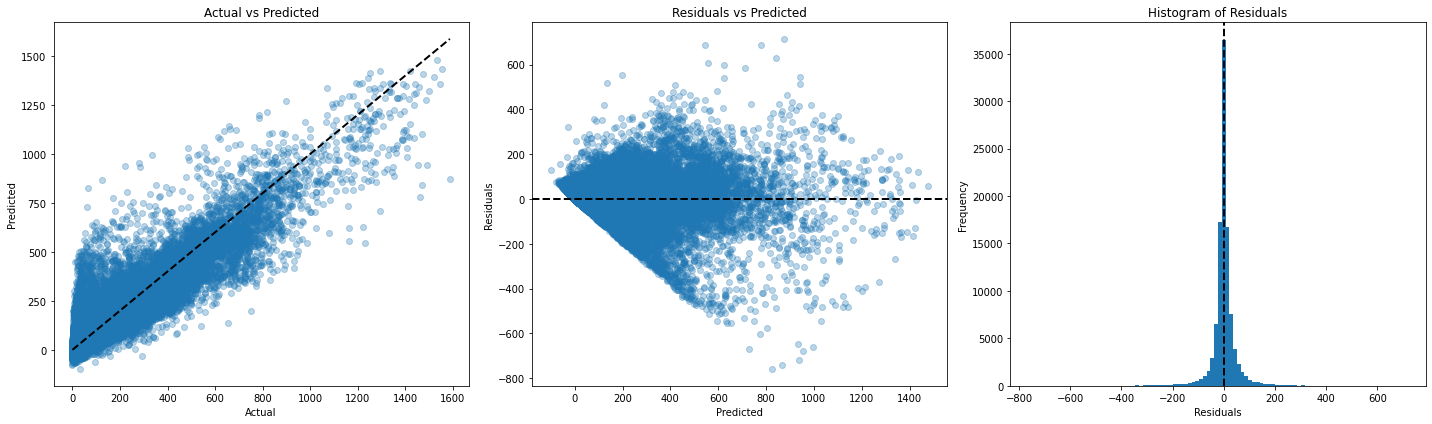

In [31]:
# evaluation visualisation
model.evaluation_vis(y_test, y_pred_gb)

In [33]:
# investigate elements with highest errors
df_errors = model.get_enornous_entrie(y_test, y_pred_gb, x_test)
df_errors.head(10)

Actual   Predicted       Error  day_of_week  hour  month  bank_holiday  start_borough_Westminster
73043     66.0  825.986048  759.986048          2.0  17.0    9.0           0.0                          1
98963    126.0  865.829022  739.829022          1.0  17.0   12.0           0.0                          1
27287    222.0  939.233816  717.233816          4.0  18.0    4.0           0.0                          1
103259  1588.0  873.053862  714.946138          2.0  15.0   12.0           1.0                          1
19187   1230.0  543.417784  686.582216          4.0  14.0    3.0           0.0                          1
103271  1464.0  778.008331  685.991669          2.0  16.0   12.0           1.0                          1
53195    278.0  955.975483  677.975483          3.0  17.0    7.0           0.0                          1
73055     62.0  730.267508  668.267508          2.0  18.0    9.0           0.0                          1
27275    334.0  995.136706  661.136706          4.0  17.0    4.0           0.0                          1
53207    285.0  934.247512  649.247512          3.0  18.0    7.0           0.0                          1

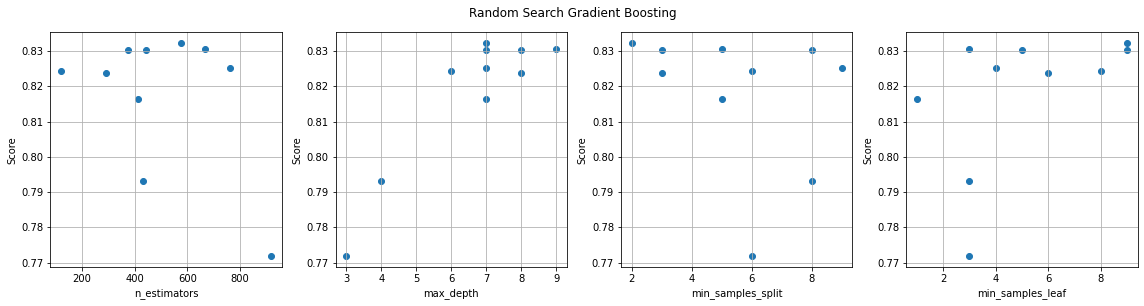

In [36]:
# visualize random search results
model.visualize_random_search_rf(random_search, 'Random Search Gradient Boosting')